In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

l_r = 0.01
epochs = 1000
step = 50

l_r=tf.cast(l_r,'float64')

trX = np.asarray([1.0,2.0,4.0,3.0,5.0])
trY = np.asarray([1.0,3.0,3.0,2.0,5.0])

#nu= tf.size(trX)
nu = trX.shape[0]
nu=tf.cast(nu,'float64')

# tf Graph Input
X = tf.placeholder("float64") 
Y = tf.placeholder("float64")

# Set model weights
m = tf.Variable(0.0, name="weight")
c = tf.Variable(0.0, name="bias")


In [2]:
mean_x = tf.reduce_mean(trX)
mean_y = tf.reduce_mean(trY)

In [3]:
var = tf.divide(tf.reduce_sum(tf.square(tf.subtract(trX,mean_x))),nu)
covar = tf.divide(tf.reduce_sum(tf.multiply(tf.subtract(trX,mean_x),tf.subtract(trY,mean_y))),nu)

In [4]:
m=tf.divide(covar,var)
c=tf.subtract(mean_y,tf.multiply(m,mean_x))

m=tf.cast(m,'float64')
c=tf.cast(c,'float64')

ss = tf.Session()
ss.run(c)

0.39999999999999947

('Epoch:', '0050', 'cost=', '0.240000000', 'M=', 0.80000000000000004, 'C=', 0.39999999999999947)
('Epoch:', '0100', 'cost=', '0.240000000', 'M=', 0.80000000000000004, 'C=', 0.39999999999999947)
('Epoch:', '0150', 'cost=', '0.240000000', 'M=', 0.80000000000000004, 'C=', 0.39999999999999947)
('Epoch:', '0200', 'cost=', '0.240000000', 'M=', 0.80000000000000004, 'C=', 0.39999999999999947)
('Epoch:', '0250', 'cost=', '0.240000000', 'M=', 0.80000000000000004, 'C=', 0.39999999999999947)
('Epoch:', '0300', 'cost=', '0.240000000', 'M=', 0.80000000000000004, 'C=', 0.39999999999999947)
('Epoch:', '0350', 'cost=', '0.240000000', 'M=', 0.80000000000000004, 'C=', 0.39999999999999947)
('Epoch:', '0400', 'cost=', '0.240000000', 'M=', 0.80000000000000004, 'C=', 0.39999999999999947)
('Epoch:', '0450', 'cost=', '0.240000000', 'M=', 0.80000000000000004, 'C=', 0.39999999999999947)
('Epoch:', '0500', 'cost=', '0.240000000', 'M=', 0.80000000000000004, 'C=', 0.39999999999999947)
('Epoch:', '0550', 'cost=', '0

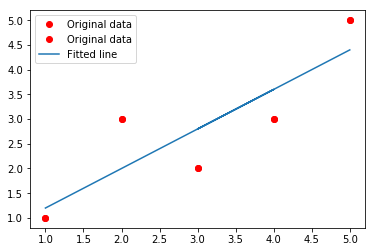

In [11]:
cal_Y = tf.add(tf.multiply(m,X),c)
cost = tf.reduce_sum(tf.pow(cal_Y-Y, 2))/(2*nu)

init = tf.global_variables_initializer()


def GDO(m,c,l_r,cost):

    t1 = tf.subtract(m,tf.multiply(tf.multiply(l_r,cost),X))
    t2 = tf.subtract(c,tf.multiply(l_r,cost))
    m=t1
    c=t2        
    return m,c

opti = GDO(m,c,l_r,cost)

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):    
        for (x, y) in zip(trX, trY):
            sess.run(opti, feed_dict={X: x, Y: y})
          
        
        if (epoch+1) % step == 0:
            CC = sess.run(cost, feed_dict={X: trX, Y:trY})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(CC),"M=", sess.run(m), "C=", sess.run(c))
    
    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: trX, Y: trY})
    print("Training cost=", training_cost, "m=", sess.run(m), "c=", sess.run(c), '\n')

    #Graphic display
    plt.plot(trX, trY, 'ro', label='Original data')
    plt.plot(trX, sess.run(m) * trX + sess.run(c), label='Fitted line')
    plt.legend()
    plt.show()
    